# Industrial Energy Consumption Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('../data/raw/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:

print(df.shape)
print(df.info())


(35040, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: 

In [4]:
print(df.describe())


          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                    

In [5]:
df.isnull().sum()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['WeekStatus', 'Day_of_week', 'Load_Type']:
    df[col] = le.fit_transform(df[col])


In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['NSM'] // 3600  # convert seconds since midnight to hours


In [8]:
df.drop(['date', 'NSM'], axis=1, inplace=True)


In [9]:
Q1 = df['Usage_kWh'].quantile(0.25)
Q3 = df['Usage_kWh'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Usage_kWh'] < (Q1 - 1.5 * IQR)) | (df['Usage_kWh'] > (Q3 + 1.5 * IQR)))]


In [10]:
df = df.drop_duplicates()


In [11]:
df.to_csv("cleaned_steel_data.csv", index=False)


In [12]:
# Define features (X) and target (y)
# Target variable is 'Usage_kWh'
y = df['Usage_kWh']
X = df.drop('Usage_kWh', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (27440, 11)
Testing set shape: (6860, 11)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Mean Absolute Error (MAE): {mae:.2f}")
print(f"Model R-squared (R2) Score: {r2:.2f}")

Model Mean Absolute Error (MAE): 2.47
Model R-squared (R2) Score: 0.98


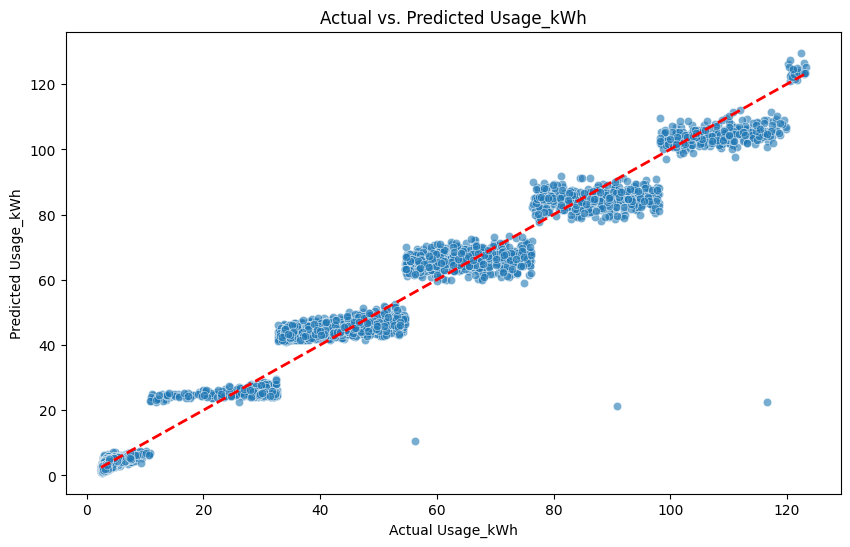

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Usage_kWh')
plt.xlabel('Actual Usage_kWh')
plt.ylabel('Predicted Usage_kWh')
plt.show()